# Exercises Lab18 Grouping

`1.` Read the `"DataSets/fruits.csv"' dataset into a dataframe. Group it by "Fruit".  Have a look at each fruit's dataframe.

In [31]:
import pandas as pd
fruits = pd.read_csv("DataSets/fruits.csv")

In [32]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 5 columns):
Unnamed: 0                    777 non-null int64
Fruit                         777 non-null object
Category                      777 non-null object
Year                          777 non-null float64
Pounds Consumed Per Capita    777 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 30.4+ KB


In [33]:
fruits = fruits.drop("Unnamed: 0", axis=1)
fruits.head()

,Fruit,Category,Year,Pounds Consumed Per Capita
0,Bananas,Non-Citrus,1980.0,20.77
1,Bananas,Non-Citrus,1981.0,21.48
2,Bananas,Non-Citrus,1982.0,22.54
3,Bananas,Non-Citrus,1983.0,21.25
4,Bananas,Non-Citrus,1984.0,22.18


In [34]:
fruit_groups = fruits.groupby("Fruit")
for fruit, df in fruit_groups:
    print(fruit, end=': ')
    print(df.count())

Apples: Fruit                         37
Category                      37
Year                          37
Pounds Consumed Per Capita    37
dtype: int64
Apricots: Fruit                         37
Category                      37
Year                          37
Pounds Consumed Per Capita    37
dtype: int64
Avocados: Fruit                         37
Category                      37
Year                          37
Pounds Consumed Per Capita    37
dtype: int64
Bananas: Fruit                         37
Category                      37
Year                          37
Pounds Consumed Per Capita    37
dtype: int64
Blueberries: Fruit                         37
Category                      37
Year                          37
Pounds Consumed Per Capita    37
dtype: int64
Cherries: Fruit                         37
Category                      37
Year                          37
Pounds Consumed Per Capita    37
dtype: int64
Cranberries: Fruit                         37
Category                

`2.` Discover the average pounds consumed per capita for each fruit, over the years given.

In [35]:
import numpy as np
fruits = fruits.replace('      na', np.nan)
fruits["Pounds Consumed Per Capita"] = fruits["Pounds Consumed Per Capita"].astype(float)
fruits.head()

,Fruit,Category,Year,Pounds Consumed Per Capita
0,Bananas,Non-Citrus,1980.0,20.77
1,Bananas,Non-Citrus,1981.0,21.48
2,Bananas,Non-Citrus,1982.0,22.54
3,Bananas,Non-Citrus,1983.0,21.25
4,Bananas,Non-Citrus,1984.0,22.18


In [36]:
fruit_groups = fruits.groupby("Fruit")
fruit_groups.mean().drop("Year", axis=1).sort_values("Pounds Consumed Per Capita", ascending=False)

,Pounds Consumed Per Capita
Fruit,
Bananas,25.671351
Apples,17.880541
Oranges,11.488649
Grapes,7.253243
Peaches & Nectarines,5.146757
Grapefruit,4.817027
Strawberries,4.785135
Pineapples,3.479459
Pears,3.074054


`3.` Here is a chart of all the colors available for your plots:

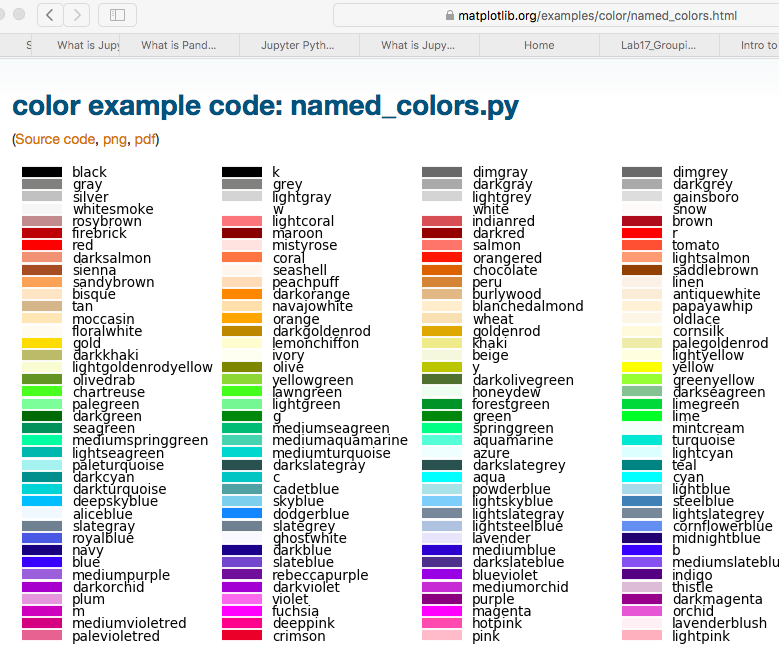

Pick a few fruits and colors and graph your fruits' consumption by year.

In [37]:
# Here I print a dictionary of the fruits, but with the values to fill in by hand:
print(', '.join('"{}":""'.format(f) for f in fruits["Fruit"].unique()))

"Bananas":"", "Apples":"", "Apricots":"", "Avocados":"", "Blueberries":"", "Cherries":"", "Cranberries":"", "Grapefruit":"", "Grapes":"", "Kiwifruit":"", "Lemons":"", "Limes":"", "Mangoes":"", "Oranges":"", "Papayas":"", "Peaches & Nectarines":"", "Pears":"", "Pineapples":"", "Plums and Prunes":"", "Strawberries":"", "Tangerines":""


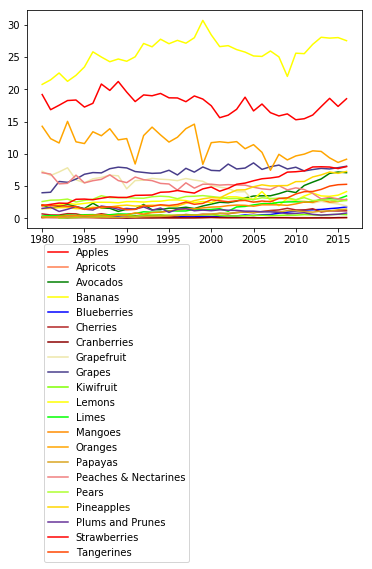

In [38]:
import matplotlib.pyplot as plt
x_values = fruit_groups.get_group("Bananas")["Year"]
colors_d = {"Bananas":"yellow", "Apples":"red", "Apricots":"coral", "Avocados":"green", "Blueberries":"blue",
            "Cherries":"firebrick", "Cranberries":"darkred", "Grapefruit":"palegoldenrod", "Grapes":"darkslateblue",
            "Kiwifruit":"chartreuse", "Lemons":"yellow", "Limes":"lime", "Mangoes":"darkorange", "Oranges":"orange", 
            "Papayas":"goldenrod", "Peaches & Nectarines":"lightcoral", "Pears":"greenyellow", "Pineapples":"gold", 
            "Plums and Prunes":"rebeccapurple", "Strawberries":"r", "Tangerines":"orangered"}
for fruit, df in fruit_groups: 
    if fruit not in colors_d:
        continue
    plt.plot(x_values, df["Pounds Consumed Per Capita"], color = colors_d[fruit], label=fruit)
plt.legend(loc='upper right', bbox_to_anchor=(0.5, -0.05))   
plt.show()

`4.` Find the total fruit consumption per capita by year and plot that.

In [39]:
fruits["Year"] = fruits["Year"].astype(int)
years = fruits["Year"].unique()
year_groups = fruits.groupby("Year")

In [40]:
totals = year_groups.sum().head()
totals

,Pounds Consumed Per Capita
Year,
1980,88.27
1981,83.89
1982,85.74
1983,90.54
1984,88.33


In [41]:
totals.plot.bar().legend(loc=4)


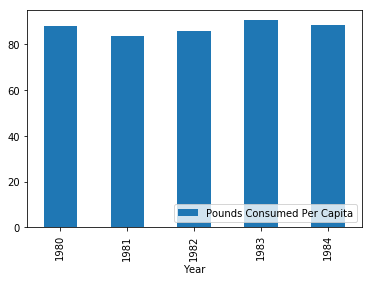

In [42]:
plt.show()